In [ ]:
import sys
sys.path.append("../Transform_DLC/")
from DLCTransformer import DLCTransformer
from DLCUndistorter import DLCUndistorter

In [ ]:
intrinsic_camera_calibration_filepath = "test_data/Bottom.p"
config_filepath = r"test_data/config.yaml"
dlc_filepath = r"test_data/206_F3-36_230824_OTR_BottomDLC_resnet50_OT_BottomCam_finalSep20shuffle1_1030000.h5"

video_filepath = "test_data/230823_Charuco_Bottom.mp4"
import imageio as iio
image = iio.v3.imread(video_filepath, index=0)
size = image.shape[1], image.shape[0]
cropping = {"offset_col_idx": 444, "offset_row_idx": 124}
# specifies the number of pixels of that the recording video is cropped in regard to the intrinsic_camera_calibration_video

In [ ]:
undistorter = DLCUndistorter(dlc_filepath=dlc_filepath, intrinsic_camera_calibration_filepath=intrinsic_camera_calibration_filepath, video_size=size, fisheye=True, cropping=cropping)

In [ ]:
undistorted = undistorter.run()

In [ ]:
transformer = DLCTransformer(dlc_df=undistorted, config_filepath=config_filepath)

In [ ]:
scaled = transformer.run()

Angle between basis vectors : 71.05770490877737


In [ ]:
scaled.head()

scorer    DLC_resnet50_OT_BottomCam_finalSep20shuffle1_1030000             \
bodyparts                                                 LED5              
coords                                                       x          y   
0                                                  38.114332   -10.292436   
1                                                  38.087093   -10.358809   
2                                                  38.002707   -10.350047   
3                                                  37.957747   -10.416766   
4                                                  37.971276   -10.406182   

scorer                                                                     \
bodyparts              TailBase                         TailEnd             
coords    likelihood          x         y likelihood          x         y   
0           0.999939  19.355110  0.317599   0.999457  33.099381 -0.490588   
1           0.999309  19.208076  0.272076   0.999549  33.339308 -0.746200   
2           0.999169  19.126908  0.391112   0.999730  30.976433  2.016573   
3           0.999056  19.142319  0.285700   0.999365  33.497132 -0.889839   
4           0.998841  19.201224  0.331035   0.999653  33.531942 -0.908273   

scorer                           ...                                          \
bodyparts             TaiMiddle  ... MazeCornerOpenLeft MazeCornerClosedLeft   
coords    likelihood          x  ...         likelihood                    x   
0           0.044979  28.020082  ...           0.999456            -0.090473   
1           0.087036  28.032339  ...           0.993826             0.051126   
2           0.057636  28.066825  ...           0.996644            -0.070420   
3           0.247008  27.774599  ...           0.993260            -0.035645   
4           0.391157  27.682851  ...           0.992684            -0.007620   

scorer                                                                   \
bodyparts                      MazeCornerOpenRight                        
coords            y likelihood                   x         y likelihood   
0          4.669137   0.998730           49.980266  0.000377   0.998656   
1          4.706614   0.998054           49.982524 -0.015807   0.996536   
2          4.703273   0.985811           50.003030  0.009038   0.999213   
3          4.673232   0.996897           49.991729 -0.017946   0.997599   
4          4.678065   0.996115           49.993791 -0.010006   0.999061   

scorer                                                
bodyparts MazeCornerClosedRight                       
coords                        x         y likelihood  
0                     -0.039843 -0.121482   0.999933  
1                     -0.104021 -0.240586   0.998832  
2                     -0.044047 -0.097016   0.999805  
3                     -0.075468 -0.110662   0.999526  
4                     -0.044292 -0.130403   0.999627  

[5 rows x 96 columns]

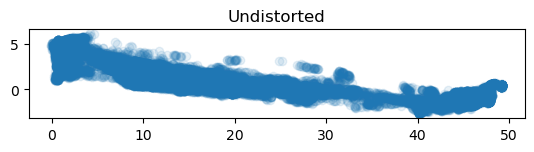

In [ ]:
import matplotlib.pyplot as plt
scorer = scaled.columns.levels[0]
scatter_bp = "Snout"
fig, ax = plt.subplots()
ax.set_aspect("equal")
plt.scatter(scaled.loc[:, (scorer, scatter_bp, "x")], scaled.loc[:, (scorer, scatter_bp, "y")], alpha=0.1)
plt.title("Undistorted")
plt.show()

Angle between basis vectors : 86.4430221121789


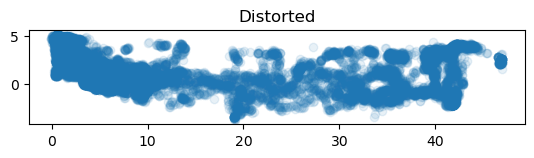

In [ ]:
transformer_dst = DLCTransformer(dlc_filepath=dlc_filepath, config_filepath=config_filepath)
scaled_dst = transformer_dst.run()


scorer = scaled_dst.columns.levels[0]
scatter_bp = "Snout"
fig, ax = plt.subplots()
ax.set_aspect("equal")
plt.title("Distorted")
plt.scatter(scaled_dst.loc[:, (scorer, scatter_bp, "x")], scaled_dst.loc[:, (scorer, scatter_bp, "y")], alpha=0.1)
plt.show()

In [ ]:
undistorted.to_csv("undistorted_normalized_bc.csv", index=False)